In [1]:
import sys

sys.path.append("../..")

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from nim.models import Net, generate
from data import create_dataset

In [3]:
T = 2000

x = create_dataset(1, T)[0]

net = Net.load_from_checkpoint("model.ckpt")
decoder = net.decoder
n, t = 1, T
y = generate(decoder, size=(n, t))
y = y.numpy().reshape(n, t)
y = y.cumsum(axis=1)
y = y[0]

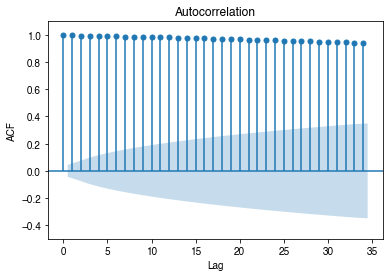

In [4]:
plot_acf(x)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.ylim(-0.5, 1.1)
plt.savefig("plots/seasonal-acf-gt.png", dpi=200)

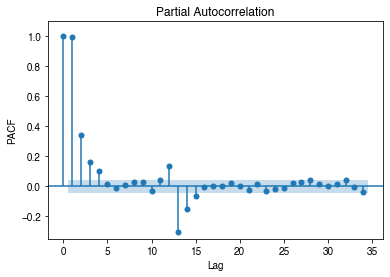

In [5]:
plot_pacf(x)
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.ylim(-0.35, 1.1)
plt.savefig("plots/seasonal-pacf-gt.png", dpi=200)

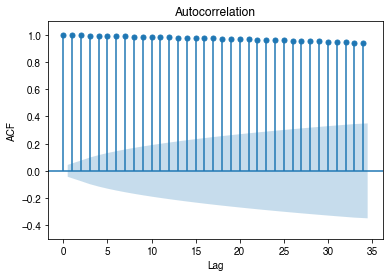

In [6]:
plot_acf(y)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.ylim(-0.5, 1.1)
plt.savefig("plots/seasonal-acf-nim.png", dpi=200)

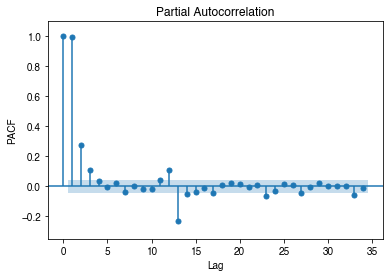

In [7]:
plot_pacf(y)
plt.xlabel("Lag")
plt.ylabel("PACF")
plt.ylim(-0.35, 1.1)
plt.savefig("plots/seasonal-pacf-nim.png", dpi=200)